In [1]:
import pandas as pd
import numpy as np
import sys
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
mpl.rcParams['pdf.fonttype'] = 42
import os
import h5py

In [2]:
file_path_now = os.getcwd()
print(file_path_now)
file_path = os.path.dirname(file_path_now)  
print(file_path)
file_path = os.path.dirname(file_path)  
print(file_path)

def df_to_dict(df):
    res={}
    keys=list(df.keys())
    for k in keys:
        try:
            for column in df[k].columns:
                if column.startswith('Unnamed'):
                    pass
                else:
                    res[column]=df[k][column]
        except:
                if k.startswith('Unnamed'):
                    pass
                else:
                    res[k]=df[k]
    return res
ENCODE_medical_wk_DATAPATH = file_path + "/Experimental_Results/data/train_data/MedNIST_hand_breast_wk.mat"
def load_medical_wk_encode_data():
    h5_file = h5py.File(ENCODE_medical_wk_DATAPATH, mode="r")
    data = {}
    for dataset in h5_file.keys():
        data[dataset] = h5_file[dataset][()]
    return data
FashionMNIST_09_DATAPATH = file_path + "/Experimental_Results/data/train_data/FashionMNIST_0-9.mat"
def load_FashionMNIST_09_encode_data():
    h5_file = h5py.File(FashionMNIST_09_DATAPATH, mode="r")
    data = {}
    for dataset in h5_file.keys():
        data[dataset] = h5_file[dataset][()]
    return data

data_FS = load_FashionMNIST_09_encode_data()
data_MD = load_medical_wk_encode_data()

/home/zhide_lu/projects/Quantum_continual_leanring/Exp_quantum_continual_learning/Experimental_Results/Figure_2_demo_quantum_continual_learning
/home/zhide_lu/projects/Quantum_continual_leanring/Exp_quantum_continual_learning/Experimental_Results
/home/zhide_lu/projects/Quantum_continual_leanring/Exp_quantum_continual_learning


## polar -- plot accuracy

In [3]:
import seaborn
df_EWC = pd.read_excel(file_path+r'/Experimental_Results/data/exp_18q/18q_loss_accuracy_EWC.xlsx',sheet_name=['task1','task2','task3'])
df_no_EWC = pd.read_excel(file_path+r'/Experimental_Results/data/exp_18q/18q_loss_accuracy_without_EWC.xlsx',sheet_name=['task1','task2','task3'])
df_last_probs = pd.read_excel(file_path+r'/Experimental_Results/data/exp_18q/18q_last_step_probs_3_task_ewc.xlsx')
df_last_probs_wo_ewc = pd.read_excel(file_path+r'/Experimental_Results/data/exp_18q/18q_last_step_probs_3_task_wo_ewc.xlsx')

res_EWC=df_to_dict(df_EWC)
res_no_EWC=df_to_dict(df_no_EWC)
last_probs=df_to_dict(df_last_probs)
last_probs_wo_ewc=df_to_dict(df_last_probs_wo_ewc)

lines=[20, 48]
a4=np.array([180, 297]) / 25

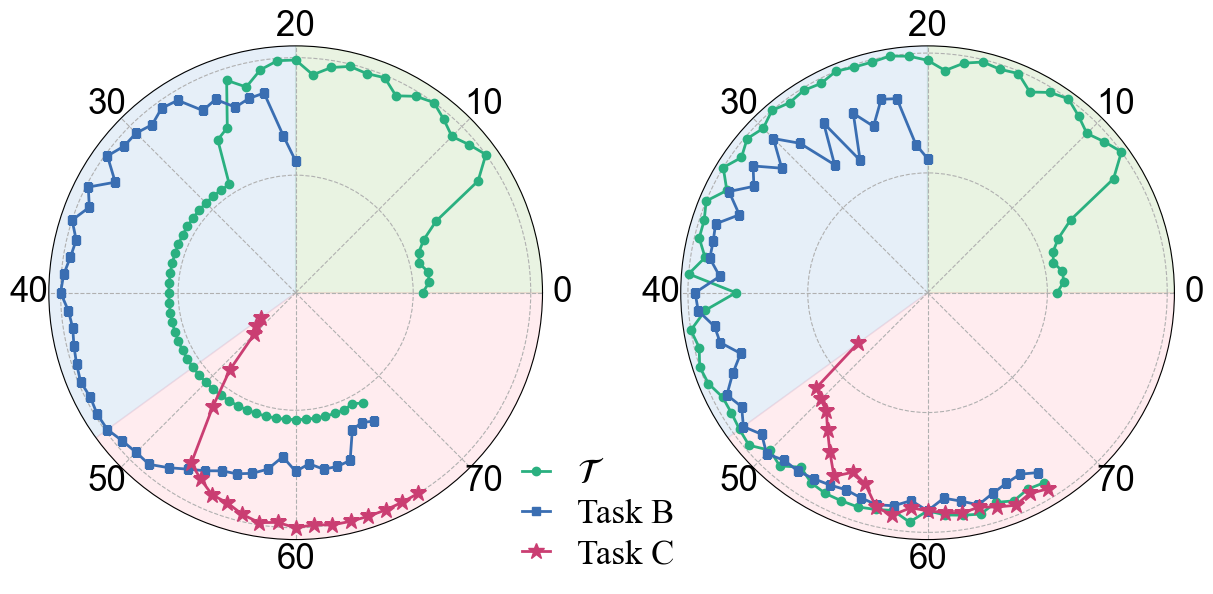

In [4]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = 12, 5.7
plt.rcParams.update({'font.size': 25})

colors = [ [c/255 for c in [42, 176, 128] ], 
         [c/255 for c in [58, 110, 178] ],
        [c/255 for c in [202, 62, 114] ] ]

task = ['FashionMNIST_09', 'medical', 'spt']
marker_list = ["o", "s", "*"] ;
alpha = 0.25 ;
lin=40/np.pi ;
label_list= ["$\mathcal{T}$", "Task B", "Task C"] ;

# fig = plt.figure(figsize=[10, 5])
fig, ((ax11, ax12)) = plt.subplots(1, 2, subplot_kw={'projection': 'polar'})

#Without ewc accuracy

for i in range(3):
    ax11.plot(res_no_EWC[f'step{i+1}']/lin,
                res_no_EWC[f'accuracy_test{i+1}'],
                color = colors[i],
                marker = marker_list[i],
                markevery = 1,
                markersize = 6 + 6*(i==2),
                label=label_list[i],
                linewidth = 2)

ax11.tick_params('y', labelsize=25, direction='out', labelbottom=True, bottom=True)
ax11.set_ylim(0.1, 1.05)
ax11.set_rlabel_position(-15)
ax11.set_yticks([0, 0.5, 1], labels = [])

ax11.tick_params('x', labelsize=25)
ax11.set_xticks(np.array([0,10,20,30,40,50,60,70])/lin, np.array([0,10,20,30,40,50,60,70]), position=(0, 0.00))
# ax.set_title('Catastrophic Forgetting ',fontsize=7,pad=0.1)

ax11.axvspan(0, 20/lin,color = [c/255 for c in [169, 209, 142] ], alpha = alpha)
ax11.axvspan(20/lin, 48/lin, color = [c/255 for c in [157, 195, 230] ], alpha = alpha)
ax11.axvspan(48/lin, 2*np.pi, color = "lightpink", alpha = alpha)

ax11.legend(frameon=False, loc=(0.93, -0.09), labelspacing=0.25, handlelength=0.8, prop = {'family':'Times New Roman'})
ax11.grid(visible=True, linestyle='--')


# With ewc accuracy
# ax=fig.add_axes([0.55, 0.01, 0.42, 0.9], projection='polar')
for i in range(3):
    ax12.plot(res_EWC[f'step{i+1}']/lin,
                res_EWC[f'accuracy_test{i+1}'],
                color=colors[i],
                marker = marker_list[i],
                markevery = 1,
                markersize = 6 + 6*(i==2),
                label=f'task{i+1}',
                alpha=1,
                linewidth=2)

ax12.tick_params('y', labelsize=15, direction='out', labelbottom=True, bottom=True)
ax12.set_ylim(0.0,1.03)
ax12.set_rlabel_position(-15)
ax12.set_yticks([0, 0.5, 1], labels = [])
# ax.set_title('Continual Learning',fontsize=7,pad=0.1)

ax12.tick_params(labelsize = 25)
ax12.set_xticks(np.array([0,10,20,30,40,50,60,70])/lin,np.array([0,10,20,30,40,50,60,70]), position = (0, 0.00))

ax12.axvspan(0, 20/lin, color = [c/255 for c in [169, 209, 142] ], alpha = alpha)
ax12.axvspan(20/lin, 48/lin, color = [c/255 for c in [157, 195, 230] ], alpha = alpha)
ax12.axvspan(48/lin, 2*np.pi, color = "lightpink", alpha = alpha)

ax12.grid(visible=True, linestyle='--')
# ax.legend(fontsize=7, loc=(-0.4, -0.1))
# ax = fig.add_axes([0.3, 0.35, 0.25, 0.25])
# plt.axis("off")

plt.subplots_adjust(left = 0.034, bottom = 0.02, top = 0.98, right = 0.972, hspace = 0.1, wspace = 0.28) 
plt.show()

In [22]:
fig.savefig('learning.pdf', format='pdf')

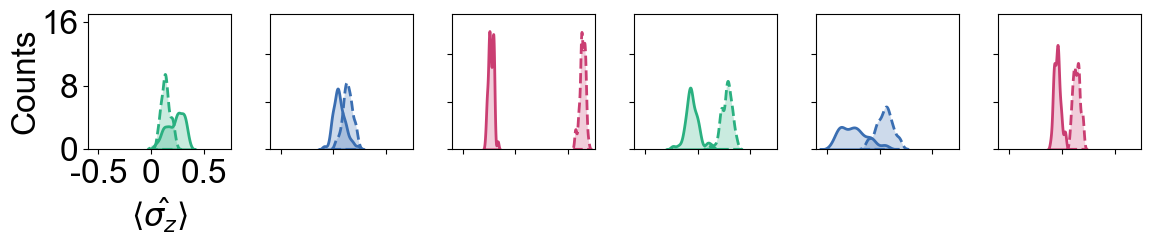

<Figure size 1200x290 with 0 Axes>

In [6]:
ax13 = ax12; ax14 = ax12; ax15 = ax12; ax16 = ax12;
# without EWC 
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = 12, 2.9
plt.rcParams.update({'font.size': 23})

ax = (ax11, ax12, ax13, ax14, ax15, ax16)
fig, ax = plt.subplots(1, 6)


fontsize = 24
kwargs = {"bw_adjust":0.7,
          "fill":True,
}
markersize = 5


for i in range(3):
    ps = [[], []]
    ys=last_probs_wo_ewc[f'y_train_task{i+1}']
    for idx, p1 in enumerate(last_probs_wo_ewc[f'p1_task{i+1}']):
        ps[int(ys[idx])].append(p1)
    idxs = np.arange(len(last_probs_wo_ewc[f'p1_task{i+1}']))
    ax[i].yaxis.set_major_locator(MaxNLocator(3))
    ax[i].xaxis.set_major_locator(MaxNLocator(3))
    sigmaz0=1-2*np.array(ps[0])
    sigmaz1=1-2*np.array(ps[1])
    seaborn.kdeplot( sigmaz0, color=colors[i], ax = ax[i], linestyle="-", **kwargs, linewidth=2)
    seaborn.kdeplot( sigmaz1, color=colors[i], ax = ax[i], linestyle="--", **kwargs, linewidth=2)
    ax[i].set_xlim(-0.6,0.75)
    ax[i].set_ylim(0, 17)
    ax[i].set_xticks(np.array([-0.5, 0, 0.5]), [-0.5, 0, 0.5], position = (0, 0.00))
    
#     ax[i].set_title(f'Task {i+1}',pad=0.1,fontsize=fontsize)
  
    if i==0 :
        ax[i].set_ylabel('Counts', size = fontsize, labelpad=0.1) 
        ax[i].set_yticks(np.array([0, 8, 16]), [0, 8, 16], position = (0, 0.00))
    else:
        ax[i].set_ylabel('')
        ax[i].yaxis.set_tick_params(labelleft=False)
        ax[i].xaxis.set_tick_params(labelleft=False)
    if i ==0 :
        ax[i].set_xlabel(r'$\langle\hat{\sigma_z}\rangle$')
    ax[i].tick_params(labelsize = fontsize)



# with EWC 
for i in range(3):
#     ax =fig.add_axes([0.35+i*0.085,0.55,0.07,0.1])
    ps = [[], []]
    ys=last_probs[f'y_train_task{i+1}']
    for idx, p1 in enumerate(last_probs[f'p1_task{i+1}']):
        ps[int(ys[idx])].append(p1)
    idxs = np.arange(len(last_probs[f'p1_task{i+1}']))
    ax[i+3].yaxis.set_major_locator(MaxNLocator(3))
    ax[i+3].xaxis.set_major_locator(MaxNLocator(3))
    seaborn.kdeplot( 1-2*np.array(ps[0]) ,ax=ax[i+3], color=colors[i], **kwargs, linewidth = 2)
    seaborn.kdeplot( 1-2*np.array(ps[1]),ax=ax[i+3], color=colors[i],linestyle="--", **kwargs, linewidth = 2)
    if i==0 :
        ax[i+3].set_ylabel('counts', size=fontsize, labelpad=0.1) 
        ax[i+3].set_ylabel('')
        ax[i+3].yaxis.set_tick_params(labelleft=False)
        ax[i+3].xaxis.set_tick_params(labelleft=False)
    else:
        ax[i+3].set_ylabel('')
        ax[i+3].yaxis.set_tick_params(labelleft=False)
        ax[i+3].xaxis.set_tick_params(labelleft=False)
    ax[i+3].set_xlim(-0.6, 0.75)
    ax[i+3].set_ylim(0, 17)
    
#     ax[i+3].set_title(f'Task {i+1}',pad=0.1,fontsize=fontsize)
#     if i ==1 :
#         ax[i+3].set_xlabel(r'$\langle\hat{\sigma_z}\rangle$')
    ax[i+3].tick_params(labelsize=fontsize)

plt.tight_layout()
plt.show()
plt.subplots_adjust(left = 0.044, bottom = 0.16, top = 0.98, right = 0.99, hspace = 0.1, wspace = 0.1) ;

In [7]:
# fig.savefig('results.pdf', format='pdf', bbox_inches='tight', facecolor='None')

## Parameter changes during the learning process

In [45]:
import seaborn
from mpl_toolkits.mplot3d import Axes3D
import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap

df_fisher_martix = pd.read_excel(file_path+r'/Experimental_Results/data/exp_18q/fisher_martix.xlsx',sheet_name=['fisher_martix'])
df_params_woEWC = pd.read_excel(file_path+r'/Experimental_Results/data/exp_18q/18q_params_gradients.xlsx',sheet_name=['params without EWC'])
df_params_EWC = pd.read_excel(file_path+r'/Experimental_Results/data/exp_18q/18q_params_gradients.xlsx',sheet_name=['params EWC'])
res_fisher_martix=df_to_dict(df_fisher_martix)
res_params_woEWC=np.array(df_params_woEWC['params without EWC'])[:,1:].astype('float')
res_params_EWC=np.array(df_params_EWC['params EWC'])[:,1:].astype('float')

colors = [ '#DB0F00','#224DDB']
colorbars1=[(0,"#ffffff"),(1.0,"#DB2400")]
colorbars2=[(0,"#ffffff"),(1.0,"#DB2400")]
mymap1=LinearSegmentedColormap.from_list('custom_cmap',colorbars1)
mymap2=LinearSegmentedColormap.from_list('custom_cmap',colorbars2)

#
fisher1 = res_fisher_martix['FashionMNIST_09']
fisher1 = np.array(fisher1) 
index1 = np.argsort(fisher1) 

thera_ewc1 = np.zeros([29,216])
thera_wo_ewc1=np.zeros([29,216])
init=copy.deepcopy(res_params_EWC[20,:])
for idx, i in enumerate(range(20,49)):
    thera_ewc1[idx] = res_params_EWC[i,:] - init
for idx, i in enumerate(range(20,49)):
    thera_wo_ewc1[idx]=res_params_woEWC[i,:] - init

#
fisher2 = res_fisher_martix['medical'] 
fisher2 = np.array(fisher2)
index2 = np.argsort( fisher2 )    #

thera_ewc2=np.zeros([20,216])
thera_wo_ewc2=np.zeros([20,216])
init_ewc=copy.deepcopy(res_params_EWC[48,:])
init_wo_ewc=copy.deepcopy(res_params_woEWC[48,:])
for idx,i in enumerate(range(48,68)):
    thera_ewc2[idx]=res_params_EWC[i,:]-init_ewc
for idx,i in enumerate(range(48,68)):
    thera_wo_ewc2[idx]=res_params_woEWC[i,:]-init_wo_ewc

In [47]:
# max(fisher1/sum(fisher1[index1]))

In [49]:
# fig, ax = plt.subplots( dpi = 300 )
# ax.plot( range(216), fisher1, marker="s", linewidth = 1, markersize = 1.5 )
# ax.plot( range(216), fisher2, marker="s", linewidth = 1, markersize = 1.5 )

In [10]:
np.mean(abs(thera_ewc1[ 28 ] ))

np.mean(abs(thera_wo_ewc1[ 28 ] ))

np.mean( abs( thera_ewc1[28][index1][205:216] ) )

np.mean( abs( thera_ewc1[28][index1][0:205] ) )

np.mean( abs( thera_wo_ewc1[28][index1][0:205] ) )

np.mean( abs( thera_wo_ewc1[28][index1][205:216] ) )

0.31897698697487925

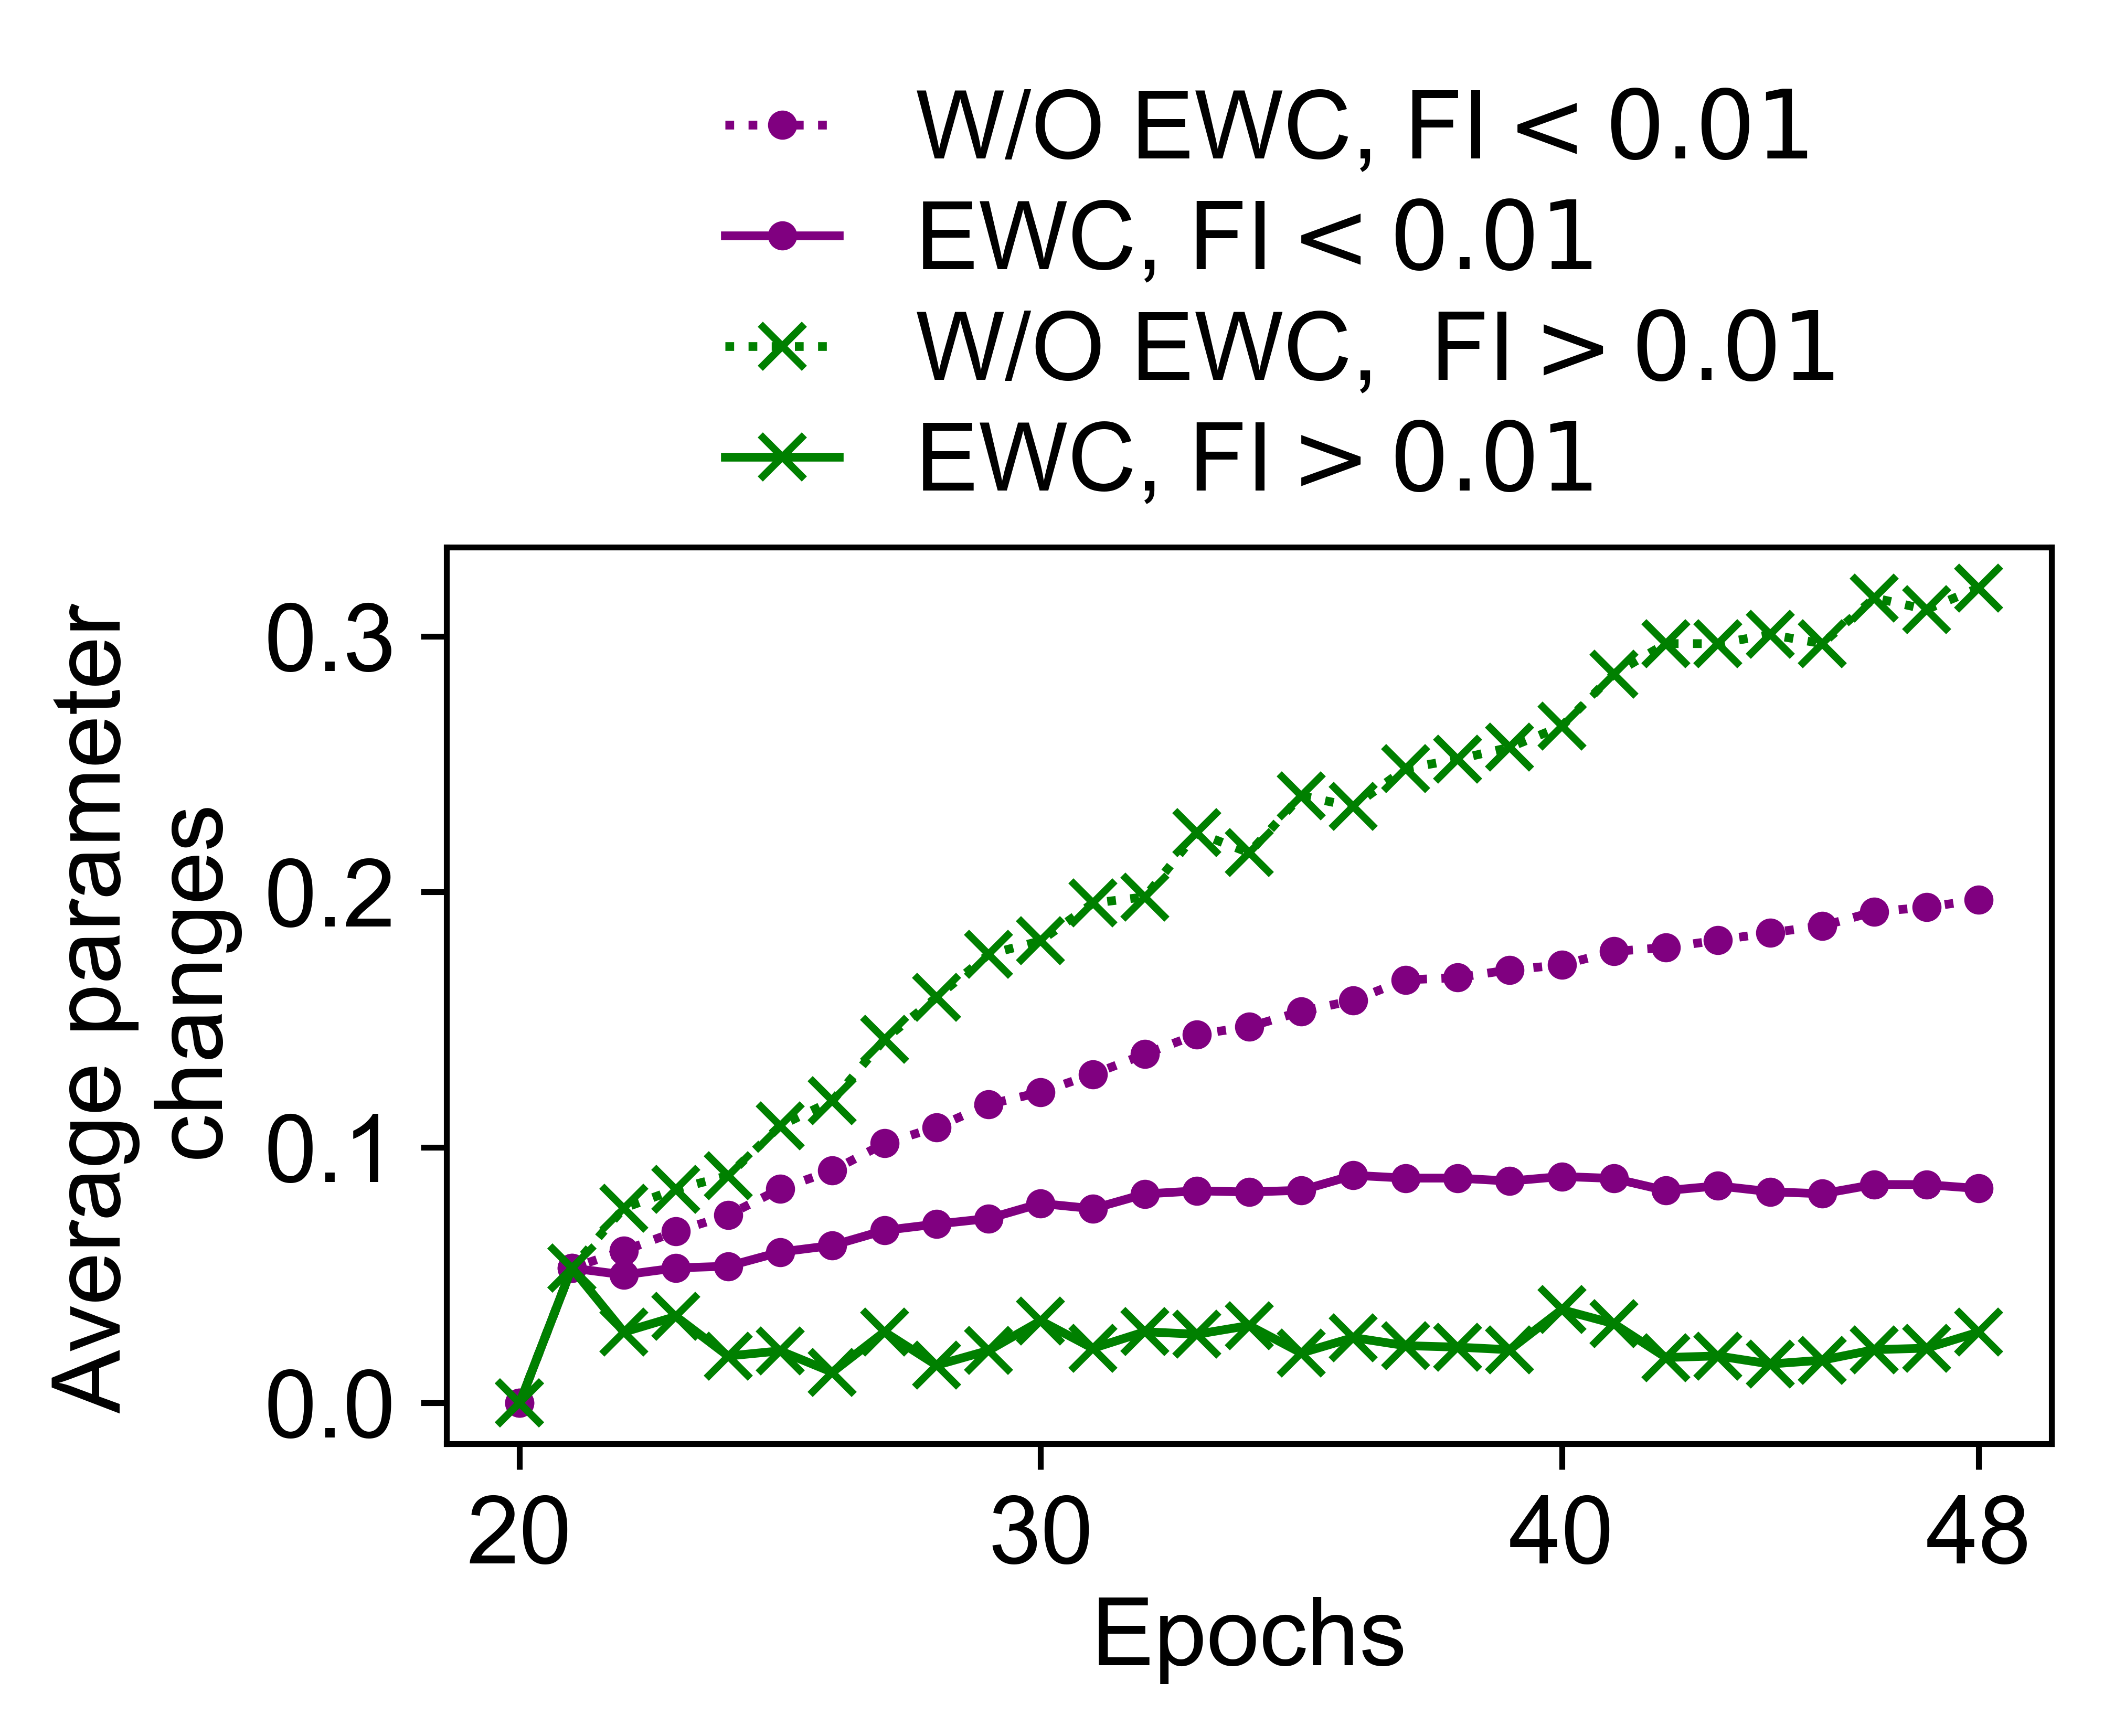

In [53]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = 4.2, 3.5
plt.rcParams.update({'font.size': 13})

fig, ax = plt.subplots( dpi=1000)

ax.plot(range(20,49), [np.mean( abs( thera_wo_ewc1[i][index1][0:205] ) ) for i in range(29)], color = 'purple', linestyle = "dotted", linewidth=1.2, 
        marker='.', markersize = 6,  label = r'W/O EWC, FI$<0.01$')
ax.plot( range(20,49),[np.mean( abs( thera_ewc1[i][index1][0:205] ) ) for i in range(29)], color = 'purple', linestyle = "-", linewidth=1.2, marker='.', 
        markersize = 6, label = r'EWC, FI$<0.01$'  )

ax.plot( range(20,49),[np.mean( abs( thera_wo_ewc1[i][index1][205:216] ) ) for i in range(29)], color = 'green', linestyle = "dotted", linewidth=1.2, 
        marker='x', markersize = 6, label = r'W/O EWC,  FI$>0.01$')

ax.plot( range(20,49),[np.mean( abs( thera_ewc1[i][index1][205:216] ) ) for i in range(29)], color = 'green', linestyle = "-", linewidth=1.2, 
        marker='x', markersize = 6, label = r'EWC, FI$>0.01$'  )

# ax.legend(frameon=False, loc=(0.01, 0.57), labelspacing=0.4, fontsize='18')
ax.set_xlabel('Epochs', labelpad = 2) 
ax.set_ylabel('Average parameter \n changes', labelpad = 3) 
ax.set_xticks([20, 30, 40, 48])

ax.legend(frameon=False, loc=(0.15, 1), labelspacing=0.25, handlelength=1.2)
plt.tight_layout()
# plt.subplots_adjust(left = 0.125, bottom = 0.17, top = 0.99, right = 0.99) 
plt.show()

In [54]:
fig.savefig('FI1_parameter_changes.pdf', format='pdf', bbox_inches='tight', facecolor='None')

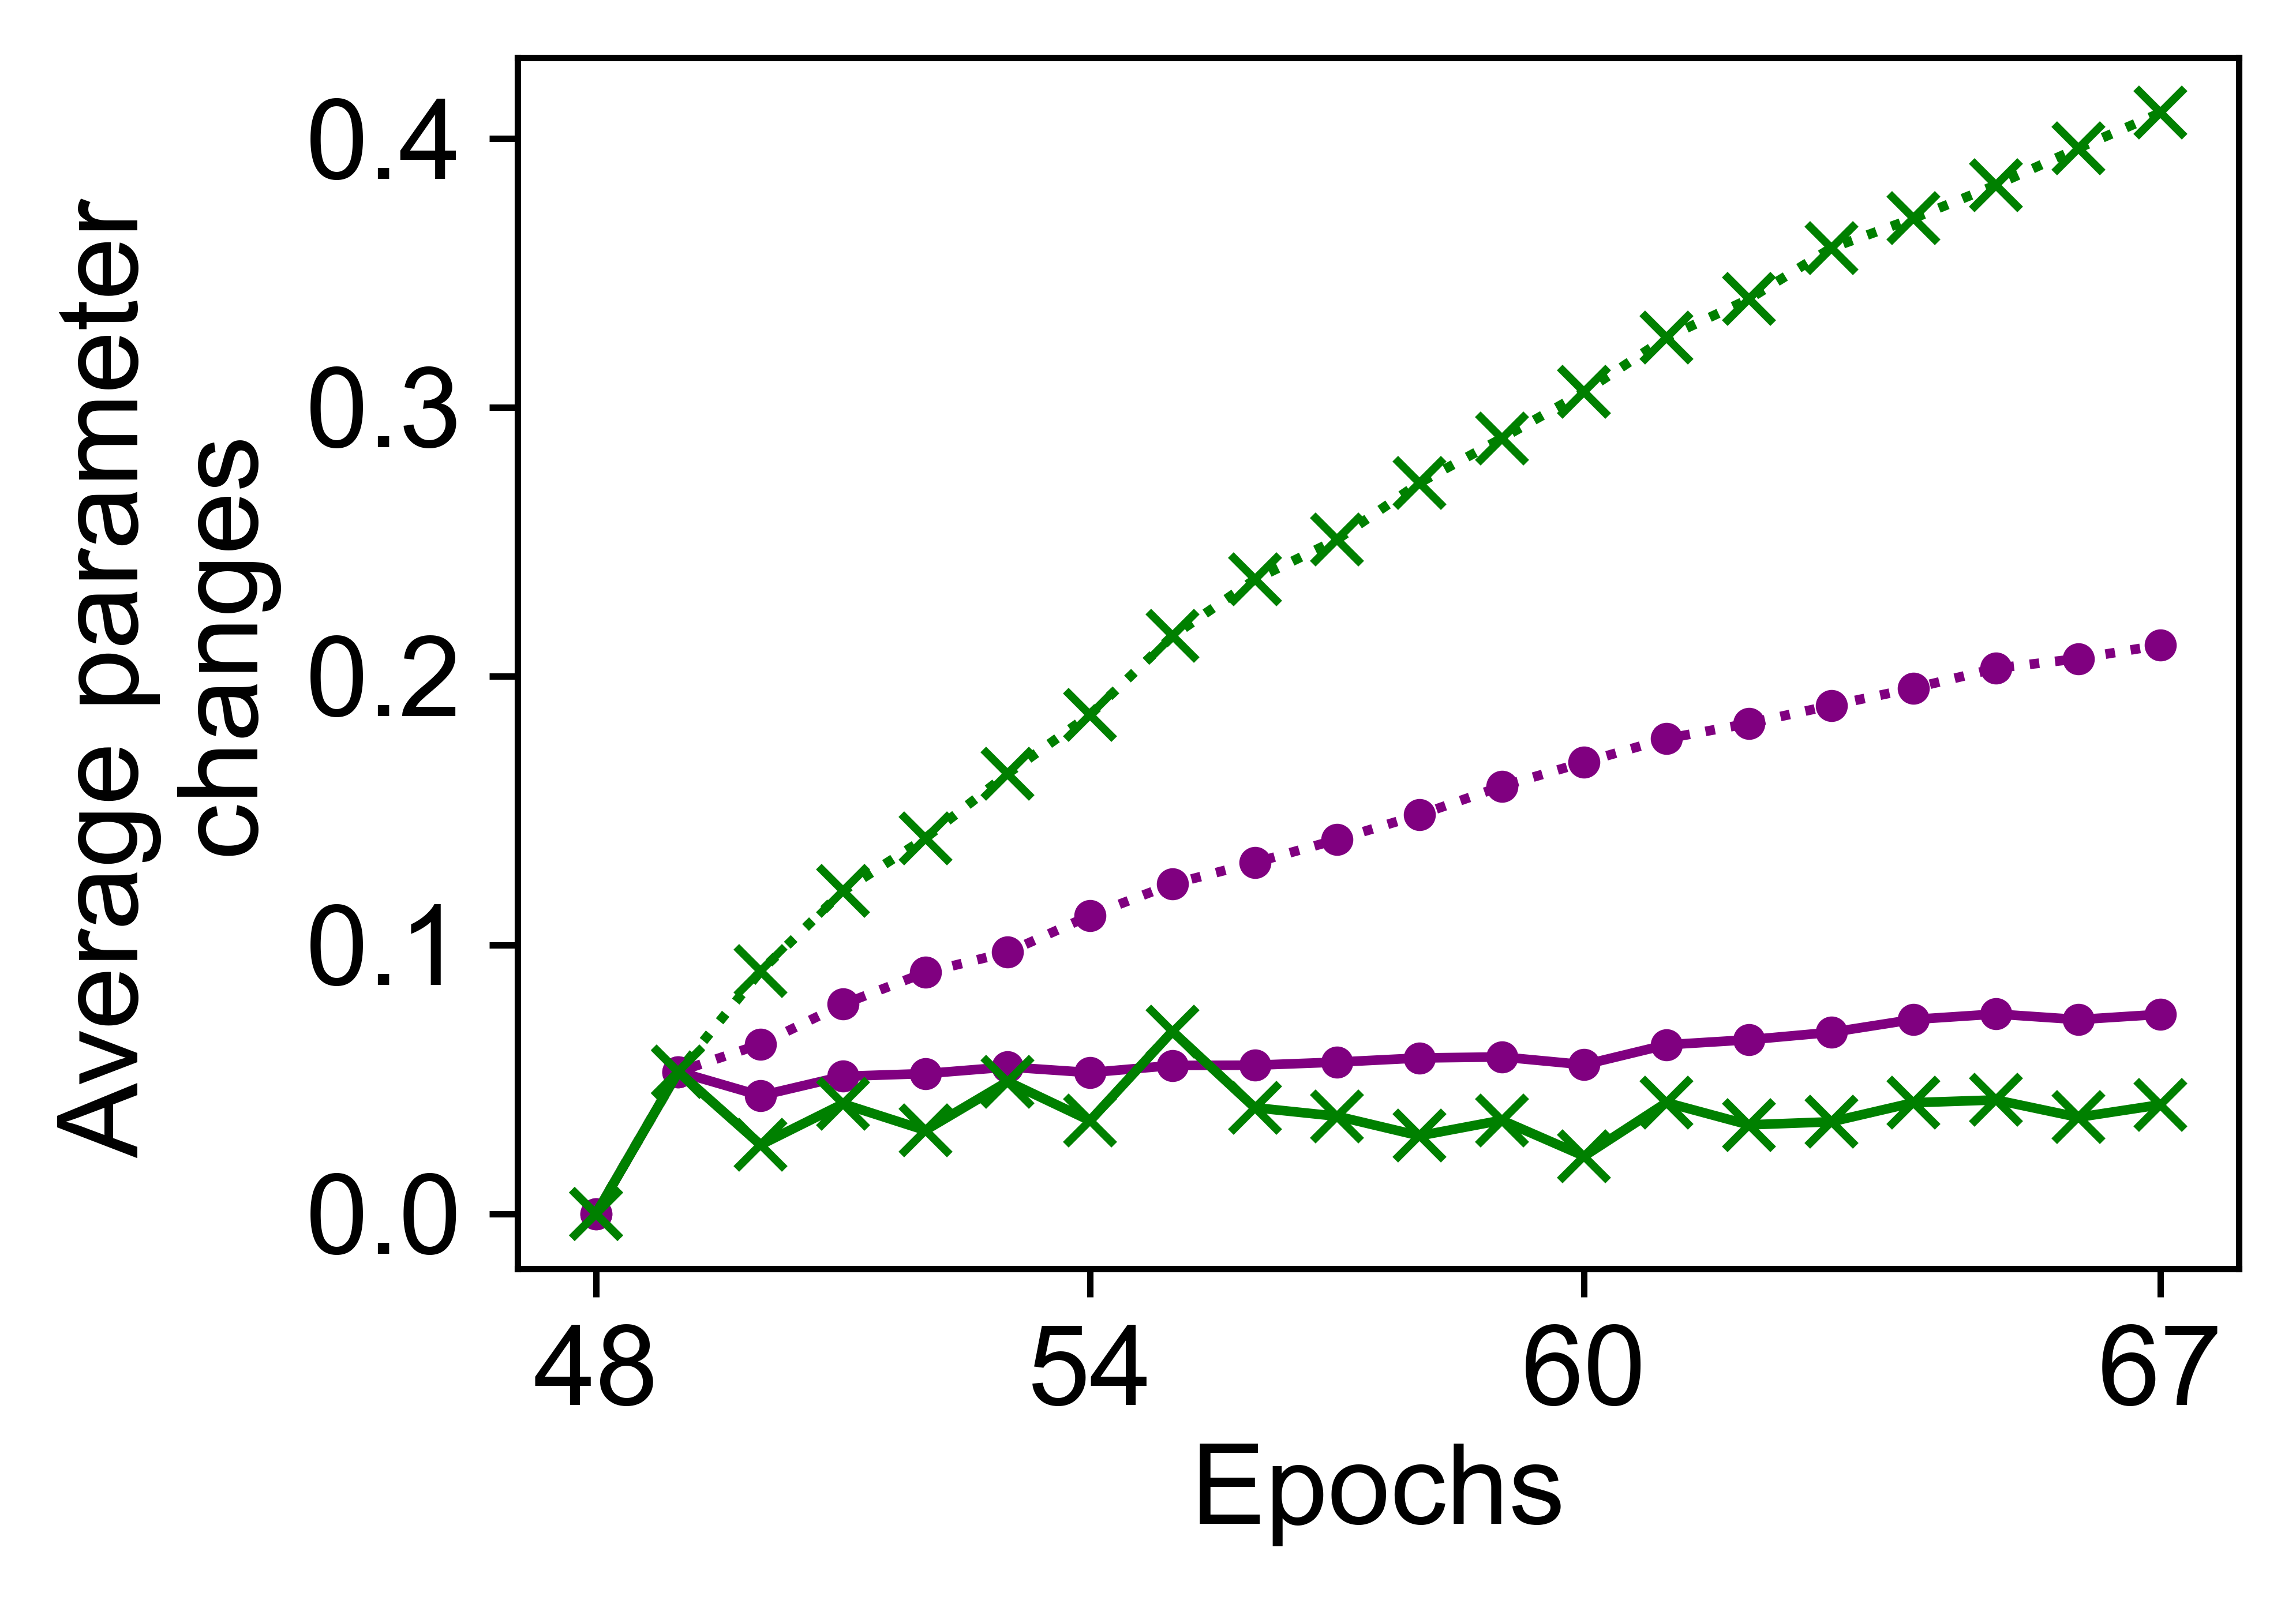

In [56]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = 4.2, 3
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots( dpi=1000)

ax.plot( range(48,68), [np.mean( abs( thera_wo_ewc2[i][index1][0:207] ) ) for i in range(20)], color = 'purple', linestyle = "dotted", linewidth=1.2, 
        marker = '.', markersize = 6,  label = r'W/O EWC, FI$<0.01$')
ax.plot( range(48,68), [np.mean( abs( thera_ewc2[i][index1][0:207] ) ) for i in range(20)], color = 'purple', linestyle = "-", linewidth=1.2, marker='.', 
        markersize = 6, label = r'EWC, FI$<0.01$'  )

ax.plot( range(48,68), [np.mean( abs( thera_wo_ewc2[i][index1][207 : 216] ) ) for i in range(20)], color = 'green', linestyle = "dotted", linewidth=1.2, 
        marker='x', markersize = 6, label = r'W/O EWC,  FI$>0.01$')

ax.plot( range(48,68), [np.mean( abs( thera_ewc2[i][index1][207:216] ) ) for i in range(20)], color = 'green', linestyle = "-", 
        linewidth=1.2, marker='x', markersize = 6, label = r'EWC, FI$>0.01$'  )

# ax.legend(frameon=True, loc=(0.01, 0.63), labelspacing=0.4, fontsize='10')
ax.set_xlabel('Epochs', labelpad = 2) 
ax.set_ylabel('Average parameter \n changes', labelpad = 3) 
ax.set_xticks([48, 54, 60, 67])

plt.tight_layout()
# plt.subplots_adjust(left = 0.145, bottom = 0.18, top = 0.99, right = 0.99) 
plt.show()

In [57]:
fig.savefig('FI2_parameter_changes.pdf', format='pdf', bbox_inches='tight', facecolor='None')

In [18]:
fisher1[index1][204:216]

97     0.009273
169    0.012324
8      0.013182
206    0.014862
99     0.017035
117    0.027306
205    0.028329
98     0.033976
116    0.036787
62     0.053294
45     0.068924
63     0.081273
Name: FashionMNIST_09, dtype: float64

In [ ]:
# np.array( fisher1[index1] )
# fisher2[index2][207:216]